In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_predict
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import LatentDirichletAllocation

In [2]:
main_url = 'http://dogtime.com/dog-breeds/'

In [9]:
#get list of links of all breeds from main page

breed_links = []

conn = urlopen(main_url)
html = conn.read()

soup = BeautifulSoup(html)
links = soup.find_all('a')

for tag in links:
    link = tag.get('href',None)
    if (link is not None) & ('dogtime.com/dog-breeds/' in link):
        if ('/characteristics/' not in link) & ('/groups' not in link):
            breed_links.append(link)

/Users/Zac/anaconda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/Zac/anaconda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [16]:
#quick deduplication
breed_links = set(breed_links)
breed_links = list(breed_links)

In [17]:
breed_links

['http://dogtime.com/dog-breeds/doberman-pinscher',
 'http://dogtime.com/dog-breeds/mutt',
 'http://dogtime.com/dog-breeds/pyrenean-shepherd',
 'http://dogtime.com/dog-breeds/xoloitzuintli',
 'http://dogtime.com/dog-breeds/whippet',
 'http://dogtime.com/dog-breeds/mastiff',
 'http://dogtime.com/dog-breeds/welsh-springer-spaniel',
 'http://dogtime.com/dog-breeds/ibizan-hound',
 'http://dogtime.com/dog-breeds/lakeland-terrier',
 'http://dogtime.com/dog-breeds/sussex-spaniel',
 'http://dogtime.com/dog-breeds/boston-terrier',
 'http://dogtime.com/dog-breeds/akita',
 'http://dogtime.com/dog-breeds/english-toy-spaniel',
 'http://dogtime.com/dog-breeds/greyhound',
 'http://dogtime.com/dog-breeds/lancashire-heeler',
 'http://dogtime.com/dog-breeds/pomsky',
 'http://dogtime.com/dog-breeds/samoyed',
 'http://dogtime.com/dog-breeds/shih-tzu',
 'http://dogtime.com/dog-breeds/wirehaired-pointing-griffon',
 'http://dogtime.com/dog-breeds/harrier',
 'http://dogtime.com/dog-breeds/golden-retriever',
 

In [165]:
def breed_parser(site):
    page = urlopen(site)
    soup = BeautifulSoup(page, 'lxml')
    features = soup.findAll('div', class_='star-by-breed')
    traits = []
    ratings = []
    breed = soup.find('h1').find(text=True)
    for feature in features:
        traits.append(feature.find('span', class_='characteristic').find(text=True))
        ratings.append(feature.find('span', class_='star').attrs['class'][1][-1])
    df = pd.DataFrame({
        'rating': ratings,
    }, index = traits).T
    df.index = [breed]
    return df

In [168]:
breed_parser(breed_links[0])

,Adaptability,Adapts Well to Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,All Around Friendliness,Affectionate with Family,Incredibly Kid Friendly Dogs,...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Exercise Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
Doberman Pinscher,3,3,3,5,2,1,4,3,5,3,...,5,2,1,1,2,4,3,3,3,5


In [171]:
frames = [breed_parser(dog) for dog in breed_links]

In [213]:
all_ratings = pd.concat(frames)

In [215]:
all_ratings.drop('Korean Jindo Dog', inplace=True) #incomplete data for this breed

In [217]:
all_ratings

,Adaptability,All Around Friendliness,Exercise Needs,Health Grooming,Trainability,Adapts Well to Apartment Living,Affectionate with Family,Amount Of Shedding,Dog Friendly,Drooling Potential,...,Potential For Playfulness,Potential For Weight Gain,Prey Drive,Sensitivity Level,Size,Tendency To Bark Or Howl,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Wanderlust Potential
Doberman Pinscher,3,3,4,4,3,3,5,4,1,4,...,5,3,1,5,4,1,2,1,4,2
Mutt,3,3,3,3,3,3,4,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Pyrenean Shepherd,3,4,5,2,3,5,5,3,2,1,...,5,3,4,4,2,5,1,4,3,2
Xoloitzcuintli,3,3,3,4,4,5,5,5,2,1,...,3,3,5,5,3,5,1,3,3,5
Whippet,3,5,4,3,4,5,5,2,4,1,...,5,1,5,5,3,1,2,1,4,4
Mastiff,2,4,4,4,2,2,5,3,2,5,...,4,4,2,3,5,2,3,4,1,1
Welsh Springer Spaniel,4,4,5,3,4,4,5,3,4,1,...,4,4,3,5,3,5,1,4,4,5
Ibizan Hound,3,5,5,3,4,5,5,3,5,1,...,5,1,5,4,3,2,2,1,4,5
Lakeland Terrier,3,4,4,3,3,4,5,2,3,1,...,4,3,4,3,2,2,2,4,4,3
Sussex Spaniel,4,5,2,3,3,5,5,3,5,1,...,4,5,1,5,2,4,1,5,5,1


In [218]:
all_ratings.to_csv('all_ratings.csv')

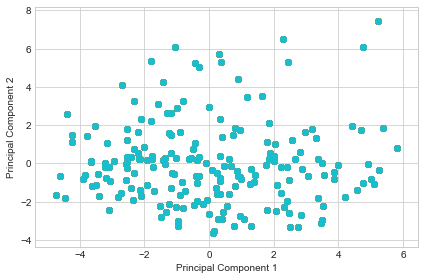

In [232]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(all_ratings)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab in all_ratings.index:
        plt.scatter(Y_sklearn[:, 0],
                    Y_sklearn[:, 1],
                    label=lab)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    #plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()